<a href="https://colab.research.google.com/github/spandangupta/Data602-Data-Analysis-Machine-Learning-Practice/blob/master/PaySim_SyntheticData_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score


In [ ]:
fin_df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [ ]:
fin_df.head(n=10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
fin_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
fin_df.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
90%,3.990000e+02,3.654233e+05,1.822508e+06,1.970345e+06,2.914267e+06,3.194870e+06,0.000000e+00,0.000000e+00
99%,6.810000e+02,1.615979e+06,1.602726e+07,1.617616e+07,1.237182e+07,1.313787e+07,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
fin_df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
fin_df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
def checking_na(df):
    try:
        if (isinstance(df, pd.DataFrame)):
            df_na_bool = pd.concat([df.isnull().any(), df.isnull().sum(), (df.isnull().sum()/df.shape[0])*100],
                                   axis=1, keys=['df_bool', 'df_amt', 'missing_ratio_percent'])
            df_na_bool = df_na_bool.loc[df_na_bool['df_bool'] == True]
            return df_na_bool
        else:
            print("{}: The input is not panda DataFrame".format(now()))

    except (UnboundLocalError, RuntimeError):
        print("{}: Something is wrong".format(now()))

In [ ]:
print(checking_na(fin_df))

Empty DataFrame
Columns: [df_bool, df_amt, missing_ratio_percent]
Index: []


In [ ]:
fin_df.isnull().values.any()

False

In [ ]:
fin_df.isnull()

In [ ]:
fin_df['isFlaggedFraud'].sum()

16

In [ ]:
finn1=fin_df['isFlaggedFraud']==1

In [ ]:
finn1

In [ ]:
len(fin_df[fin_df.step == 743])

8

In [ ]:
fin_df['isFlaggedFraud']=1

In [ ]:
fin_df[fin_df.isFlaggedFraud == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [ ]:
fin_df[fin_df.amount>200000]

In [ ]:
fin_df[fin_df.amount > 1500000].shape

(71861, 11)

In [ ]:
fin_df[fin_df.nameDest == 'C891140444']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1


In [ ]:
fin_df[(fin_df.amount == 0) & (fin_df.isFraud == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


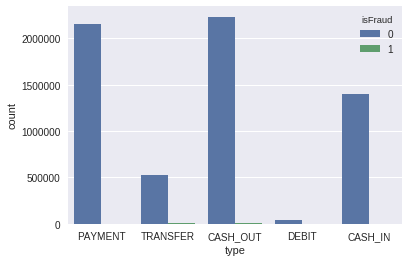

In [ ]:
import seaborn as sns
sns.countplot(fin_df['type'], hue = fin_df['isFraud'])  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


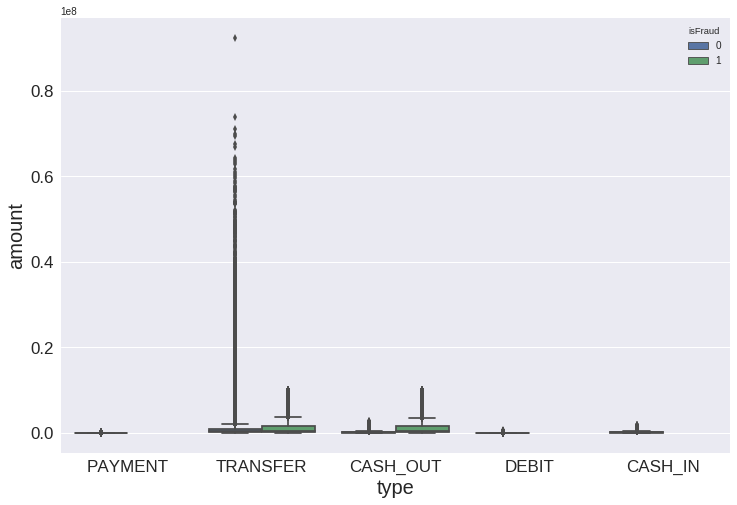

In [ ]:
plt.figure(figsize=(12,8))
b1=sns.boxplot(hue = 'isFraud', x = 'type', y = 'amount', data = fin_df)
b1.set_xlabel('type', fontsize=20)
b1.set_ylabel('amount',fontsize=20)
b1.tick_params(labelsize=17)
sns.plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


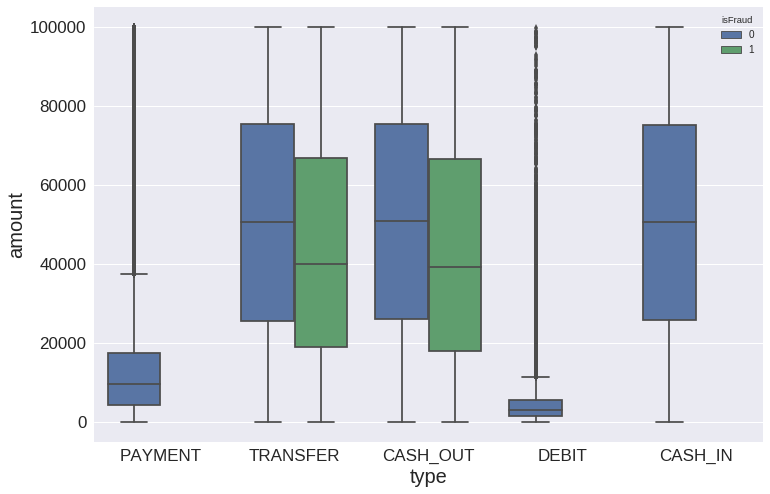

In [ ]:
plt.figure(figsize=(12,8))
b1=sns.boxplot(hue = 'isFraud', x = 'type', y = 'amount', data = fin_df[fin_df.amount < 1e5])
b1.set_xlabel('type', fontsize=20)
b1.set_ylabel('amount',fontsize=20)
b1.tick_params(labelsize=17)
sns.plt.show()

In [ ]:
# fin_df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1, inplace=True)

In [ ]:
print('\n The types of fraudulent transactions are {}'.format(\
list(fin_df.loc[fin_df.isFraud == 1].type.drop_duplicates().values))) # only 'CASH_OUT' 
                                                             # & 'TRANSFER'

dfFraudTransfer = fin_df.loc[(fin_df.isFraud == 1) & (fin_df.type == 'TRANSFER')]
dfFraudCashout = fin_df.loc[(fin_df.isFraud == 1) & (fin_df.type == 'CASH_OUT')]
  
print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer))) 

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout))) 


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


In [ ]:
import plotly.graph_objs as go

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



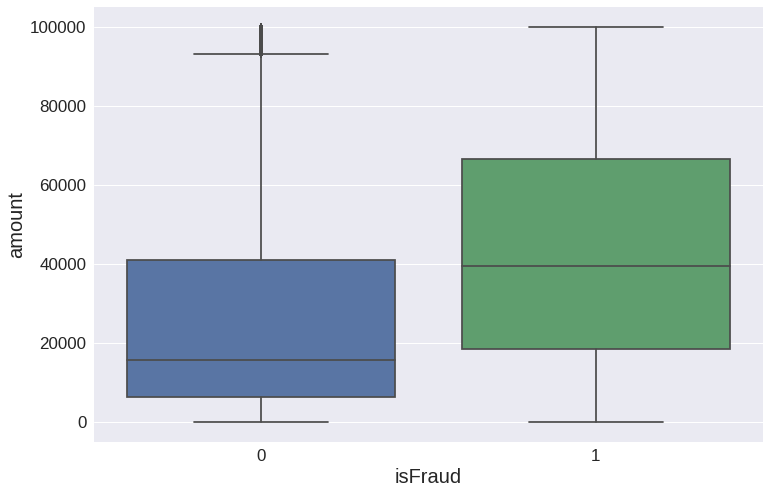

In [ ]:
plt.figure(figsize=(12,8))
b1=sns.boxplot(x = 'isFraud', y = 'amount', data = df[df.amount < 1e5])
b1.set_xlabel("isFraud",fontsize=20) 
b1.set_ylabel("amount",fontsize=20)
b1.tick_params(labelsize=17)
sns.plt.show()

In [ ]:
df_corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

data = [
    go.Heatmap(
        z=df_corr.corr().values,
        x=df_corr.columns.values,
        y=df_corr.columns.values,
        colorscale='Viridis',
        text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of all numeric features',
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



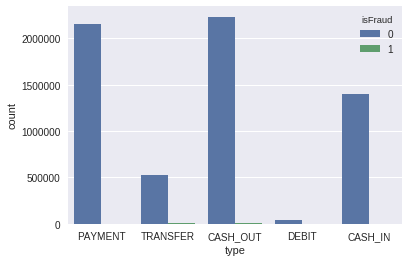

In [ ]:
import seaborn as sns
sns.countplot(df['type'], hue = df['isFraud'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



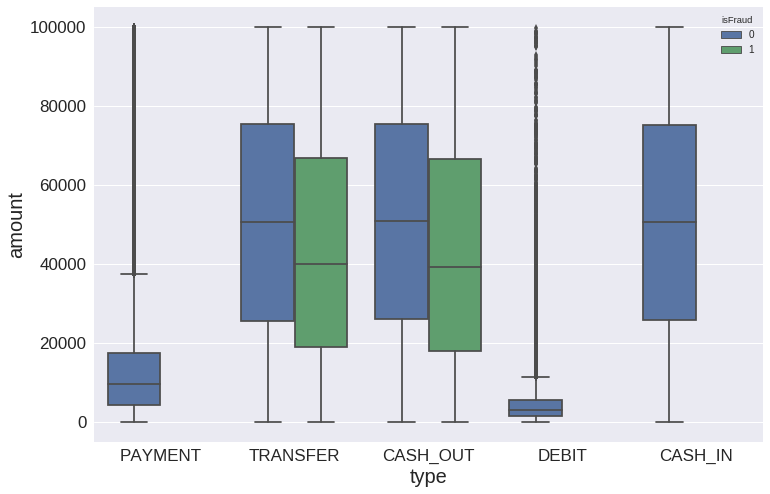

In [ ]:
plt.figure(figsize=(12,8))
b1=sns.boxplot(hue = 'isFraud', x = 'type', y = 'amount', data = df[df.amount < 1e5])
b1.set_xlabel('type', fontsize=20)
b1.set_ylabel('amount',fontsize=20)
b1.tick_params(labelsize=17)
sns.plt.show()

In [ ]:
# sns.scatterplot(data=fin_df, y="amount", x="type", hue="isFraud")

In [ ]:
# sns.countplot(data=fin_df[fin_df.amount > 1e5], x="type", hue="isFraud")

In [ ]:
# sns.catplot(x="type", y="isFlaggedFraud", data=fin_df[fin_df.amount > 1e5])

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(fin_df[['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']], hue='isFraud')

In [ ]:
# df = df.sample(636262) 
plt.figure(figsize=(12,8))
b1 = sns.pairplot(fin_df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']], hue='isFraud')
b1.set_xlabel('type', fontsize=20) 
b1.set_ylabel('amount',fontsize=20)x`
b1.tick_params(labelsize=17)

In [ ]:
fin_df[fin_df['isFraud']==1].groupby('type').count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
CASH_OUT,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116
TRANSFER,4097,4097,4097,4097,4097,4097,4097,4097,4097,4097


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_toScale = fin_df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
      'oldbalanceDest', 'newbalanceDest'
       ]]
new_X = sc.fit(X_toScale)
X_scaled = new_X.transform(X_toScale)

In [ ]:
scaled_df = pd.DataFrame(X_scaled, columns=['amount', 'oldbalanceOrg', 'newbalanceOrig',
      'oldbalanceDest', 'newbalanceDest'
       ])

In [ ]:
# we have also some categorical variable, called Type. Let's convert it to dummies, and then add to our final dataframe
dummy_df = pd.DataFrame(pd.get_dummies(fin_df['type']))
#now, final dataframe
final_df = scaled_df.join(dummy_df, how = 'outer')

In [ ]:
final_df.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,1,0
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,1,0
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,0,0,0,0,1
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,0,1,0,0,0
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier() 

X = final_df 
y = fin_df['isFraud'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
model = rfc.fit(X_train,y_train)

predictions = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.95      0.78      0.86      2435

   micro avg       1.00      1.00      1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906257      94]
 [    528    1907]]
